step 2

In [41]:
import numpy as np
import matplotlib.pyplot as plt

data = np.genfromtxt('55Cnc.txt', skip_header = 22)
time = data[:, 0] #Time, Julian calendar
rv = data[:, 1] #Radial Velocity in m/s
uncertainty = data[:, 2] #Uncertainty in radial velocity

<function matplotlib.pyplot.show(close=None, block=None)>

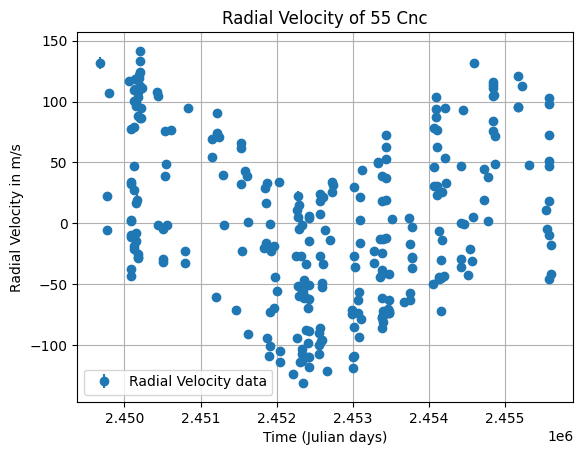

In [42]:
plt.errorbar(time, rv, yerr = uncertainty, fmt = 'o', label = 'Radial Velocity data')
plt.xlabel('Time (Julian days)')
plt.ylabel('Radial Velocity in m/s')
plt.title('Radial Velocity of 55 Cnc')
plt.legend()
plt.grid(True)
plt.show

Step 3

<function matplotlib.pyplot.show(close=None, block=None)>

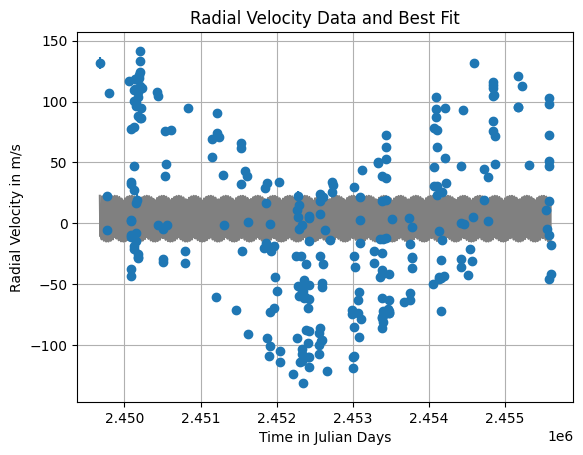

In [43]:
from scipy.optimize import curve_fit

def rv_model(t, K, P, phi, gamma):
    return K * np.sin(2 * np.pi * t/P + phi) + gamma

#Initial Guesses: K = 50 m/s, P = 15 days, phase = 0, offset = 0
p0 = [50, 15, 0, 0]

# Fit with uncertainty
params, cov = curve_fit(rv_model, time, rv, p0 = p0, sigma = uncertainty, absolute_sigma = True, maxfev = 10000)
K, P, phi, gamma = params

# plotting the fit
t_fit = np.linspace(time.min(), time.max(), 1000)
rv_fit = rv_model(t_fit, *params)

plt.errorbar(time, rv, yerr = uncertainty, fmt = 'o', label = 'Data')
plt.plot(t_fit, rv_fit, label = 'Best Fit', color = 'grey')
plt.xlabel('Time in Julian Days')
plt.ylabel('Radial Velocity in m/s')
plt.legend
plt.title("Radial Velocity Data and Best Fit")
plt.grid(True)
plt.show

Step 4

Standard Deviation of residuals: 64.35 m/s


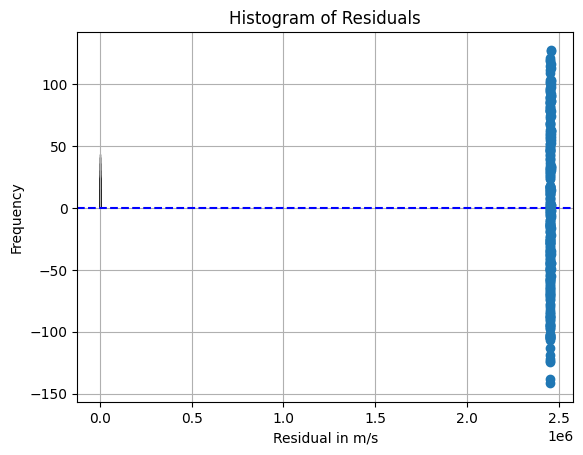

In [44]:
residuals = rv - rv_model(time, *params)

plt.errorbar(time, residuals, yerr = uncertainty, fmt = 'o')
plt.axhline(0, color = 'blue', linestyle = '--')
plt.xlabel("time in julian days")
plt.ylabel('frequency')
plt.title('residuals of radial velocity fit')
plt.grid(True)
plt.show


plt.hist(residuals, bins = 'auto', edgecolor = 'black')
plt.xlabel('Residual in m/s')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(True)
plt.show

residual_std = np.std(residuals)
print(f'Standard Deviation of residuals: {residual_std:.2f} m/s')

Step 6

In [45]:
def est_mass(K, P, M_star=0.905):
    return (K * (P ** (1/3))) / (28.4329 * (M_star ** (2/3)))

mass1 = est_mass(K, P)
print(f"Estimated Mass: {mass1:.5f} Jupiter masses")

Estimated Mass: 1.74576 Jupiter masses
